# Principal Component Analysis
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.

In this homework, we will use scikit-learn to explore the components, explained variance and noise filtering of PCA.


### Set up environments

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

## PCA as noise filtering on digits dataset
PCA can be used as a filtering approach for noisy data.

The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.

So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

In this section, we will explore the noise filtering on the digits dataset from scikit-learn.

### Load the digits dataset from scikit-learn
The digits dataset here is a little different from the MNIST dataset used in the previous homeworks.

It still has 10 classes from 0 - 9, but each image is only 8 * 8. Each class has around 180 samples and totally it has 1797 samples.


In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

### Define the plot_digits function to plot several of the input noise-free data

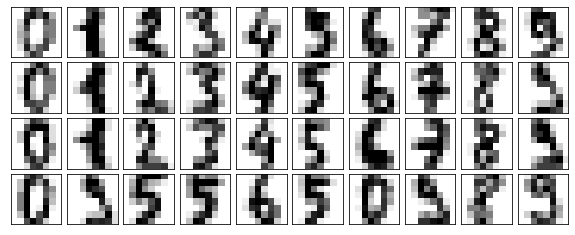

In [21]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

### Apply noise filtering
Now let's try to do the noise filtering as followings:

  1. Add some random noise to create a noisy dataset, and re-plot the digits.

  2. Train a PCA on the noisy data with the projection perserve 50% of the variance.

  3. Use the inverse of the transform to reconstruct the filtered digits.

Helpful Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

This signal preserving/noise filtering property makes PCA a very useful feature selection routine.

For example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

### (TODO) Add some random noise to create a noisy dataset, and re-plot the digits

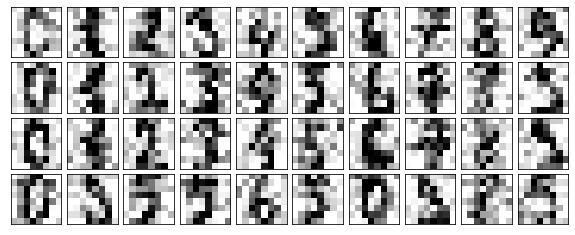

In [22]:
# Code goes below
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

### (TODO) Train a PCA on the noisy data with the projection perserve 50% of the variance

In [23]:
# Code goes below
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

### (TODO) Use the inverse of the transform to reconstruct the filtered digits

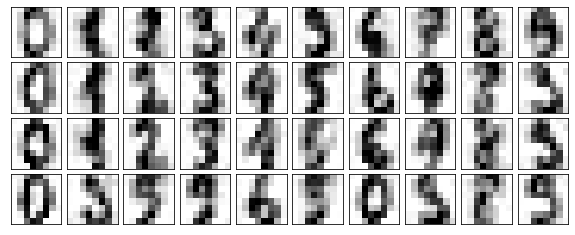

In [24]:
# Code goes below
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## PCA as dimensionality reduction on california housing dataset
Now let's switch the gear to the dimensionality reduction, which is PCA's main application.

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In this section, we will use the california housing dataset from scikit-learn.

### Load the california housing dataset from scikit-learn
The california housing dataset has a total of 20640 samples with 8 dimensionality.

In [27]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.data.shape

(20640, 8)

### Use pandas to visualize the dataset

In [28]:
housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(housing.data)
df.head(5)

TypeError: ignored

### Apply dimensionality reduction
Now let's try to do the dimensionality reduction as followings:

  1. Choose the number of components that can represent 99.99% of the data.

  2. Visualize the first and second principal components in a scatter plot.

  3. Investigate the principal components and extract possible meanings.

### (TODO) Choose the number of components that can represent 99.99% of the data

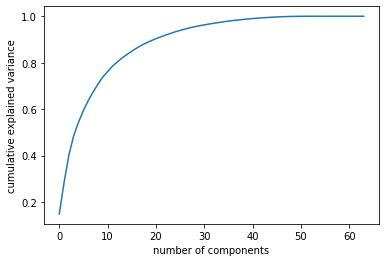

In [29]:
# Code goes below
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### (TODO) Visualize the first and second principal components in a scatter plot

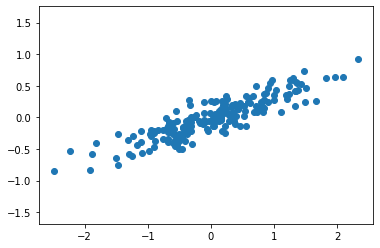

In [30]:
# Code goes below
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

### (TODO) Investigate the principal components and extract possible meanings

In [33]:
# Code goes below
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

As the plots show, the population affects the first principal component and the house age affects the second principal component.